In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
keyword_matrix_neurips = pd.read_csv('keyword_counts_neurips.csv')
keyword_matrix_icml = pd.read_csv('keyword_counts_icml.csv')

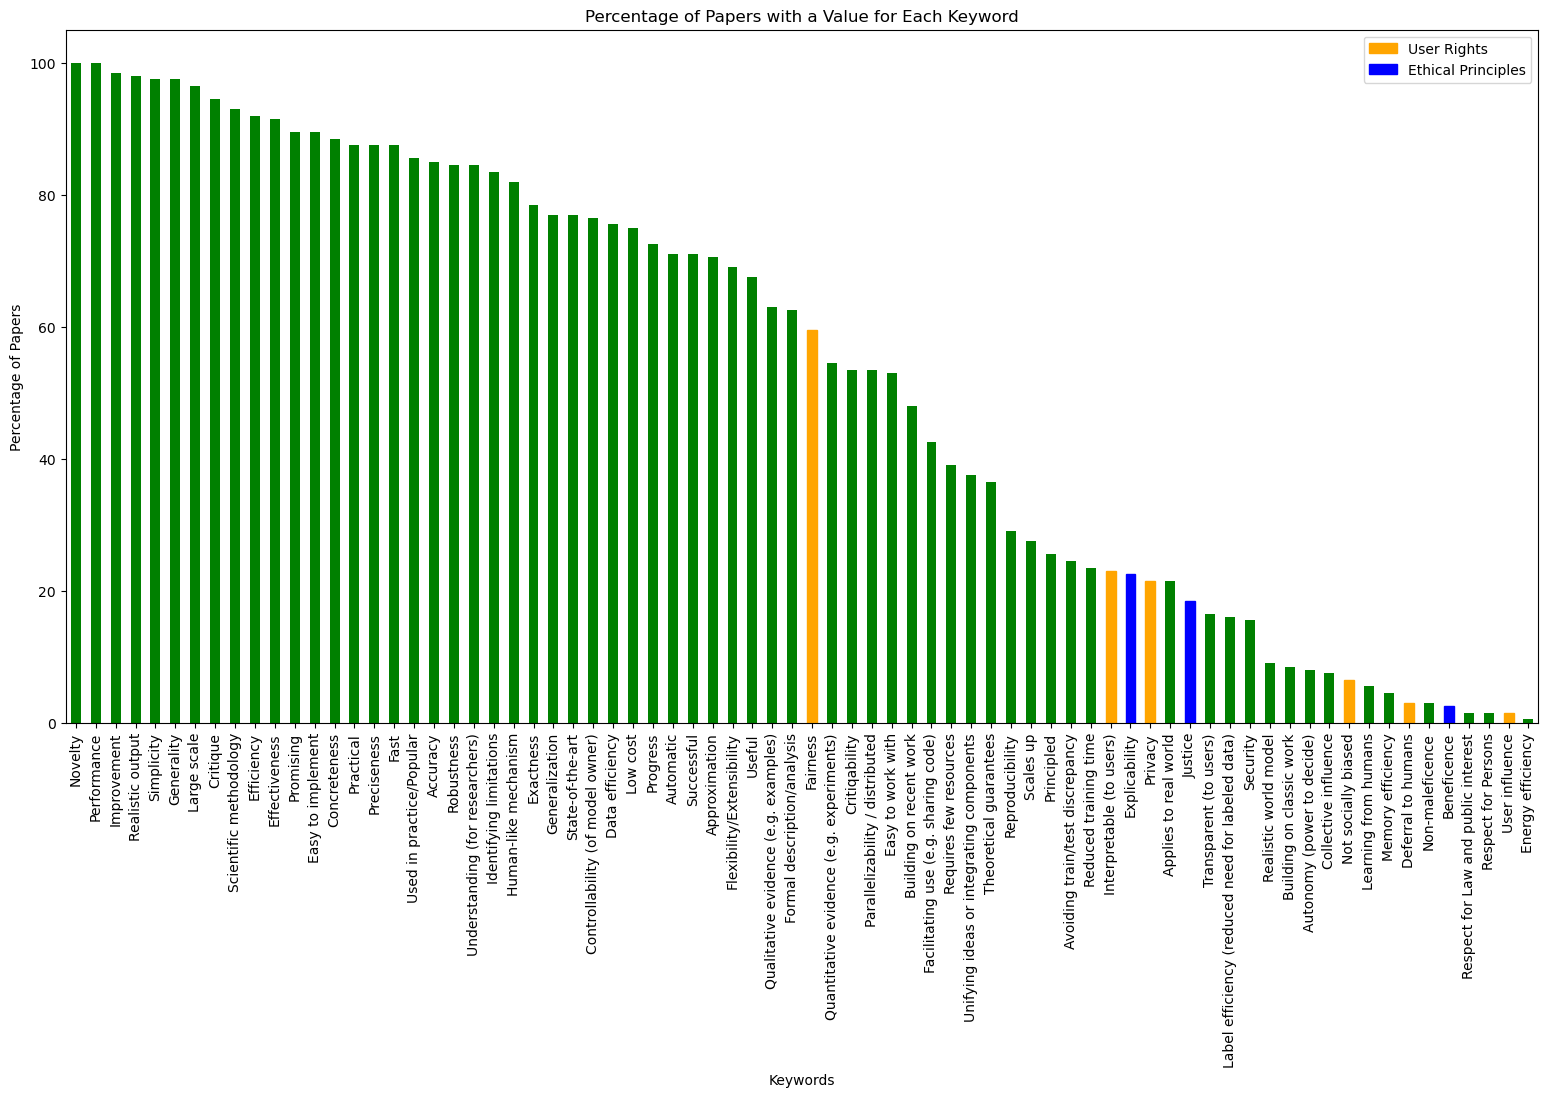

In [8]:
# Combine the two dataframes
combined_df = pd.concat([keyword_matrix_neurips, keyword_matrix_icml])

# Calculate the percentage of papers with a value for each keyword
percentage_with_value = (combined_df.iloc[:, 1:] > 0).mean() * 100
percentage_with_value_sorted = percentage_with_value.sort_values(ascending=False)

# Define the keywords to be highlighted in red
highlight_keywords_user_rights = ['Interpretable (to users)', 'Deferral to humans', 'Privacy', 'User influence', 'Not socially biased', 'Fairness']
highlight_keywords_ethics = ['Beneficence', 'Non-Maleficience', 'Resprect for Law and Public Interest', 'Explicability', 'Autonomy (Power to decide)', 'Justice']

# Plot the percentages
plt.figure(figsize=(19, 9))
bars = percentage_with_value_sorted.plot(kind='bar', color='green')

# Highlight specific bars in orange for user rights
for keyword in highlight_keywords_user_rights:
    if keyword in percentage_with_value_sorted.index:
        bars.patches[percentage_with_value_sorted.index.get_loc(keyword)].set_color('orange')

# Highlight specific bars in blue for ethics
for keyword in highlight_keywords_ethics:
    if keyword in percentage_with_value_sorted.index:
        bars.patches[percentage_with_value_sorted.index.get_loc(keyword)].set_color('blue')

# Add legend
orange_patch = mpatches.Patch(color='orange', label='User Rights')
blue_patch = mpatches.Patch(color='blue', label='Ethical Principles')
plt.legend(handles=[orange_patch, blue_patch])

plt.title('Percentage of Papers with a Value for Each Keyword')
plt.xlabel('Keywords')
plt.ylabel('Percentage of Papers')
plt.xticks(rotation=90)

# Save the plot
plt.savefig('plots/percentage_both_conferences.png')

plt.show()

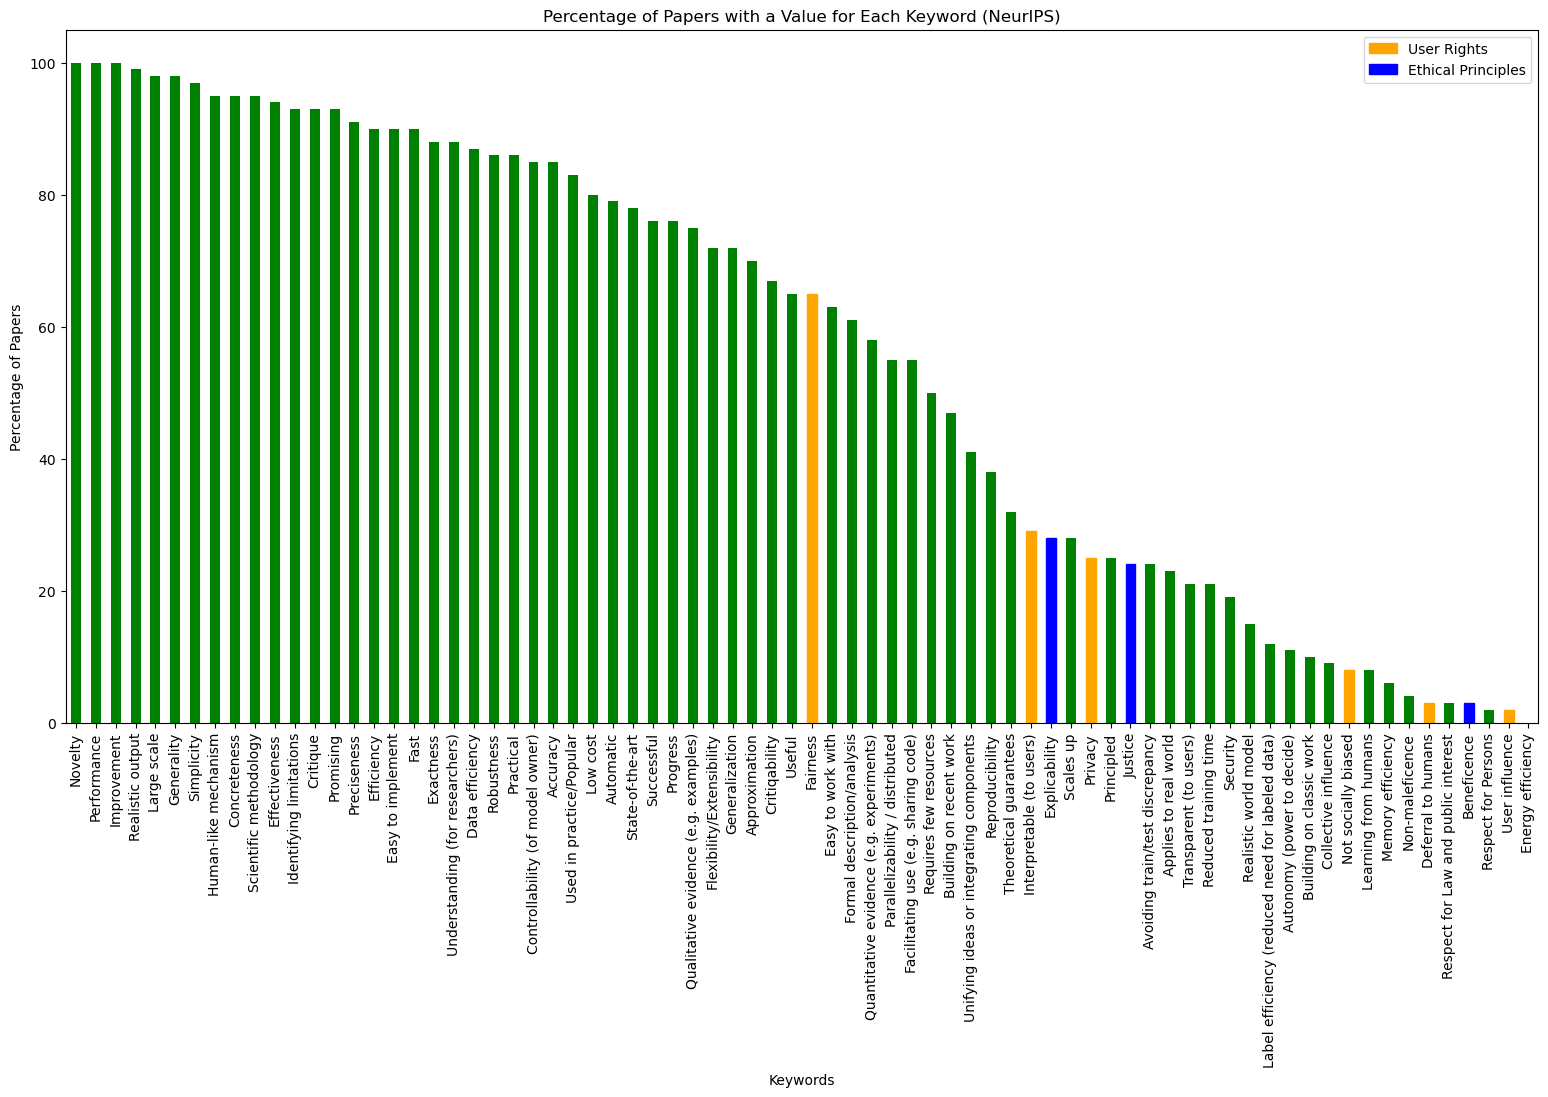

<Figure size 640x480 with 0 Axes>

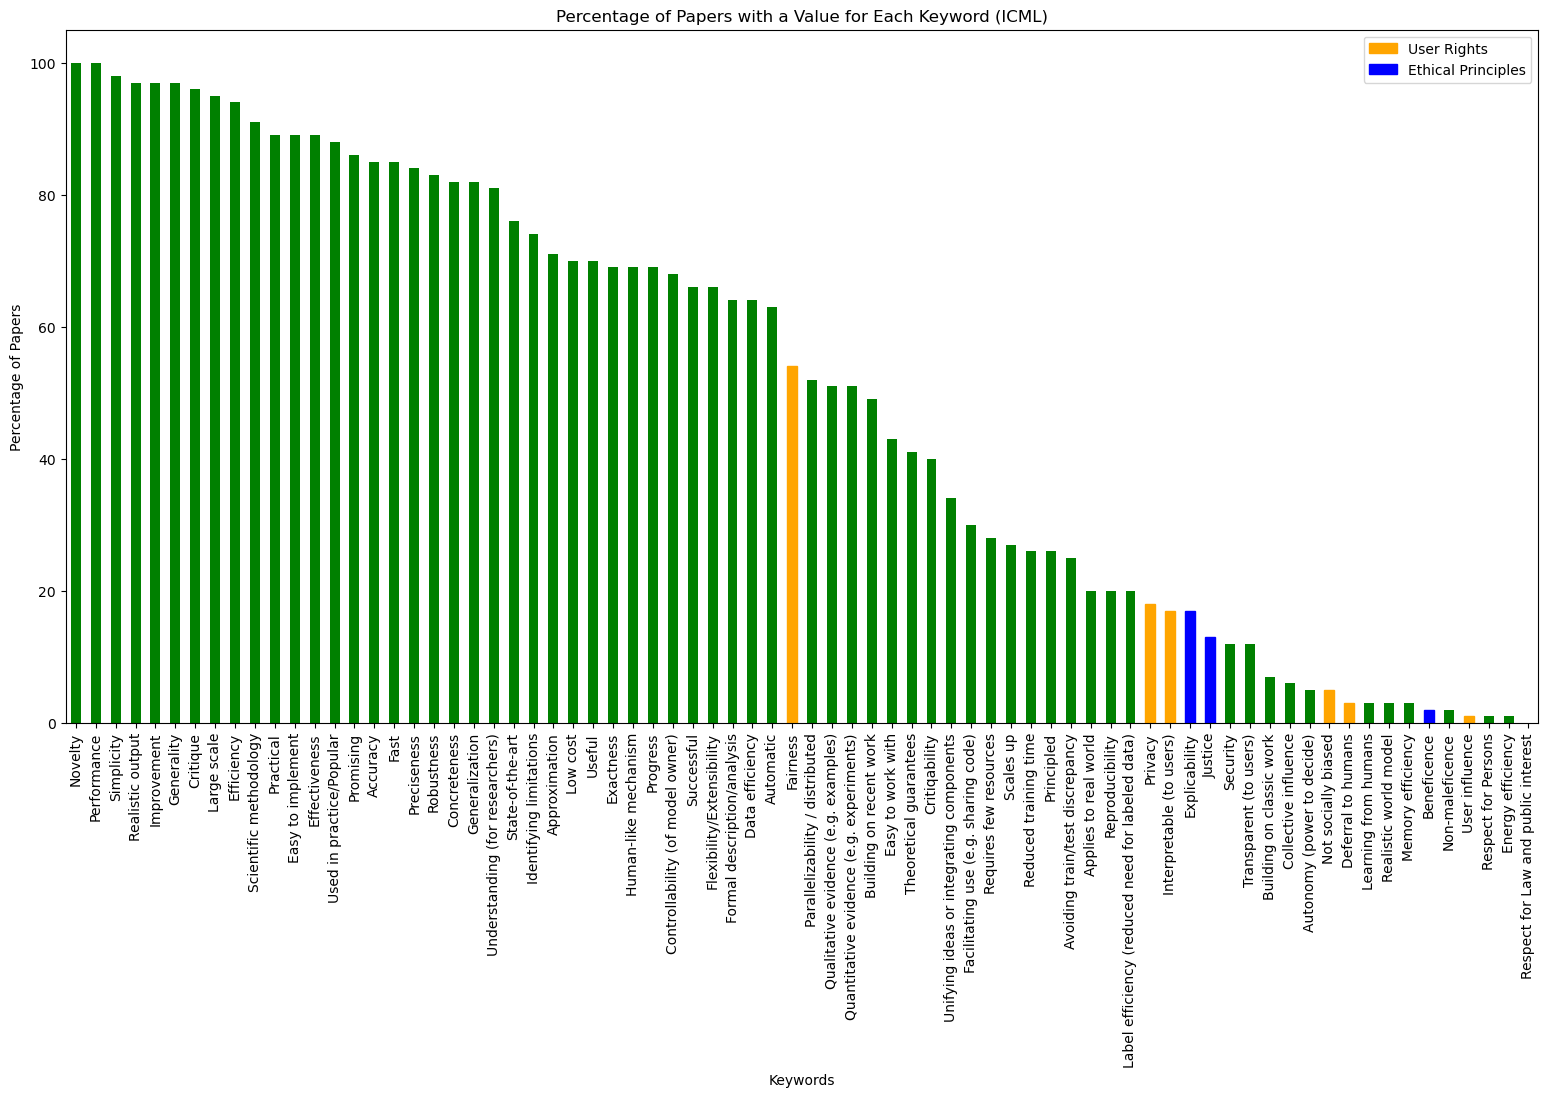

<Figure size 640x480 with 0 Axes>

In [10]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Calculate the percentage of papers with a value for each keyword for NeurIPS
percentage_with_value_neurips = (keyword_matrix_neurips.iloc[:, 1:] > 0).mean() * 100
percentage_with_value_sorted_neurips = percentage_with_value_neurips.sort_values(ascending=False)

# Calculate the percentage of papers with a value for each keyword for ICML
percentage_with_value_icml = (keyword_matrix_icml.iloc[:, 1:] > 0).mean() * 100
percentage_with_value_sorted_icml = percentage_with_value_icml.sort_values(ascending=False)

# Define the keywords to be highlighted in red
highlight_keywords_user_rights = ['Interpretable (to users)', 'Deferral to humans', 'Privacy', 'User influence', 'Not socially biased', 'Fairness']
highlight_keywords_ethics = ['Beneficence', 'Non-Maleficience', 'Resprect for Law and Public Interest', 'Explicability', 'Autonomy (Power to decide)', 'Justice']

# Plot the percentages for NeurIPS
plt.figure(figsize=(19, 9))
bars_neurips = percentage_with_value_sorted_neurips.plot(kind='bar', color='green')

# Highlight specific bars in orange for user rights
for keyword in highlight_keywords_user_rights:
    if keyword in percentage_with_value_sorted_neurips.index:
        bars_neurips.patches[percentage_with_value_sorted_neurips.index.get_loc(keyword)].set_color('orange')

# Highlight specific bars in blue for ethics
for keyword in highlight_keywords_ethics:
    if keyword in percentage_with_value_sorted_neurips.index:
        bars_neurips.patches[percentage_with_value_sorted_neurips.index.get_loc(keyword)].set_color('blue')

# Add legend
orange_patch = mpatches.Patch(color='orange', label='User Rights')
blue_patch = mpatches.Patch(color='blue', label='Ethical Principles')
plt.legend(handles=[orange_patch, blue_patch])

plt.title('Percentage of Papers with a Value for Each Keyword (NeurIPS)')
plt.xlabel('Keywords')
plt.ylabel('Percentage of Papers')
plt.xticks(rotation=90)
plt.show()

# Save the plot
plt.savefig('plots/percentage_neurips.png')

# Plot the percentages for ICML
plt.figure(figsize=(19, 9))
bars_icml = percentage_with_value_sorted_icml.plot(kind='bar', color='green')

# Highlight specific bars in orange for user rights
for keyword in highlight_keywords_user_rights:
    if keyword in percentage_with_value_sorted_icml.index:
        bars_icml.patches[percentage_with_value_sorted_icml.index.get_loc(keyword)].set_color('orange')

# Highlight specific bars in blue for ethics
for keyword in highlight_keywords_ethics:
    if keyword in percentage_with_value_sorted_icml.index:
        bars_icml.patches[percentage_with_value_sorted_icml.index.get_loc(keyword)].set_color('blue')

# Add legend
plt.legend(handles=[orange_patch, blue_patch])

plt.title('Percentage of Papers with a Value for Each Keyword (ICML)')
plt.xlabel('Keywords')
plt.ylabel('Percentage of Papers')
plt.xticks(rotation=90)
plt.show()



# Save the plot
plt.savefig('plots/percentage_icml.png')

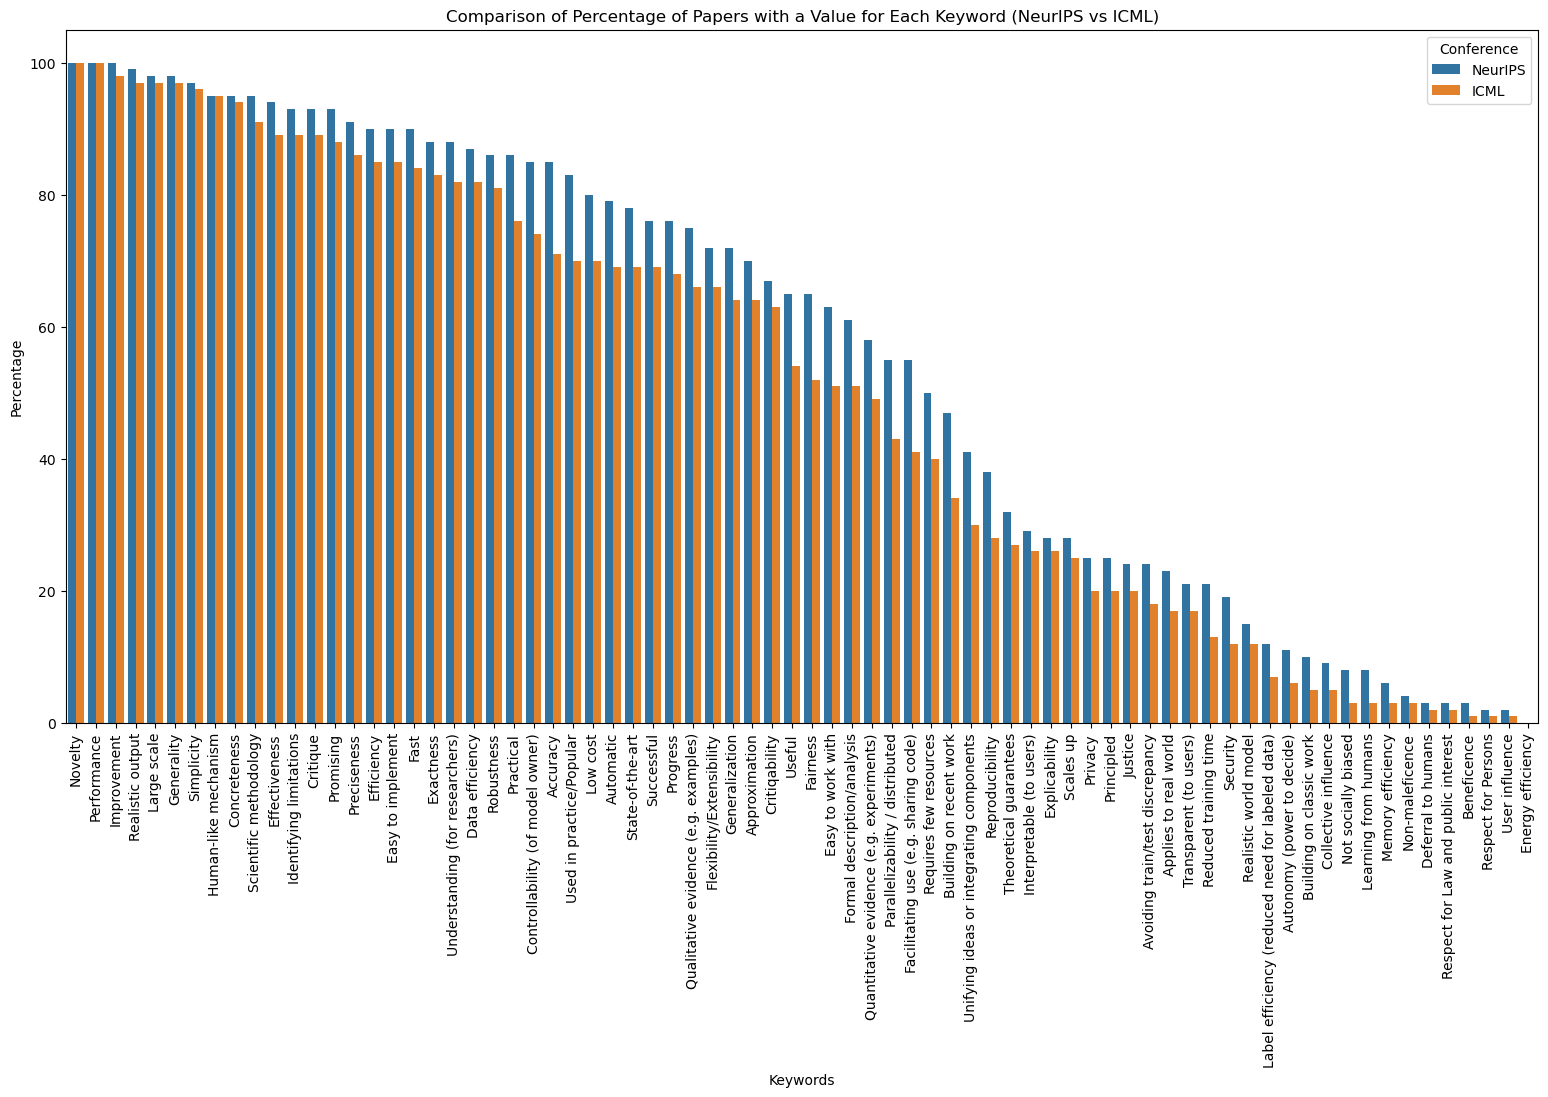

<Figure size 640x480 with 0 Axes>

In [11]:
# Merge the percentage dataframes for NeurIPS and ICML
merged_percentage_df = pd.DataFrame({
    'Keyword': percentage_with_value_sorted_neurips.index,
    'NeurIPS': percentage_with_value_sorted_neurips.values,
    'ICML': percentage_with_value_sorted_icml.values
})

# Melt the dataframe for easier plotting with seaborn
melted_percentage_df = merged_percentage_df.melt(id_vars='Keyword', var_name='Conference', value_name='Percentage')

# Plot using seaborn
plt.figure(figsize=(19, 9))
sns.barplot(data=melted_percentage_df, x='Keyword', y='Percentage', hue='Conference')
plt.title('Comparison of Percentage of Papers with a Value for Each Keyword (NeurIPS vs ICML)')
plt.xlabel('Keywords')
plt.ylabel('Percentage')
plt.xticks(rotation=90)
plt.legend(title='Conference')
plt.show()

# Save the plot
plt.savefig('plots/percentage_comparison_conferences.png')

In [12]:
# Read the values.csv file
values_df = pd.read_csv('values.csv')

# Merge values_df with percentage_with_value
merged_df = values_df.merge(percentage_with_value.reset_index(), left_on='Value', right_on='index')
merged_df.drop('index', axis=1, inplace=True)

# rename columns to value, birhane percentage and percentage 2023
merged_df.columns = ['Value', 'Birhane Percentage', 'Percentage 2023']
merged_df

,Value,Birhane Percentage,Percentage 2023
0,Performance,96.0,100.0
1,Generalization,89.0,77.0
2,Quantitative evidence (e.g. experiments),85.0,54.5
3,Efficiency,84.0,92.0
4,Novelty,77.0,100.0
...,...,...,...
56,Fairness,1.0,59.5
57,Collective influence,1.0,7.5
58,Autonomy (power to decide),0.0,8.0
59,Respect for Persons,0.0,1.5


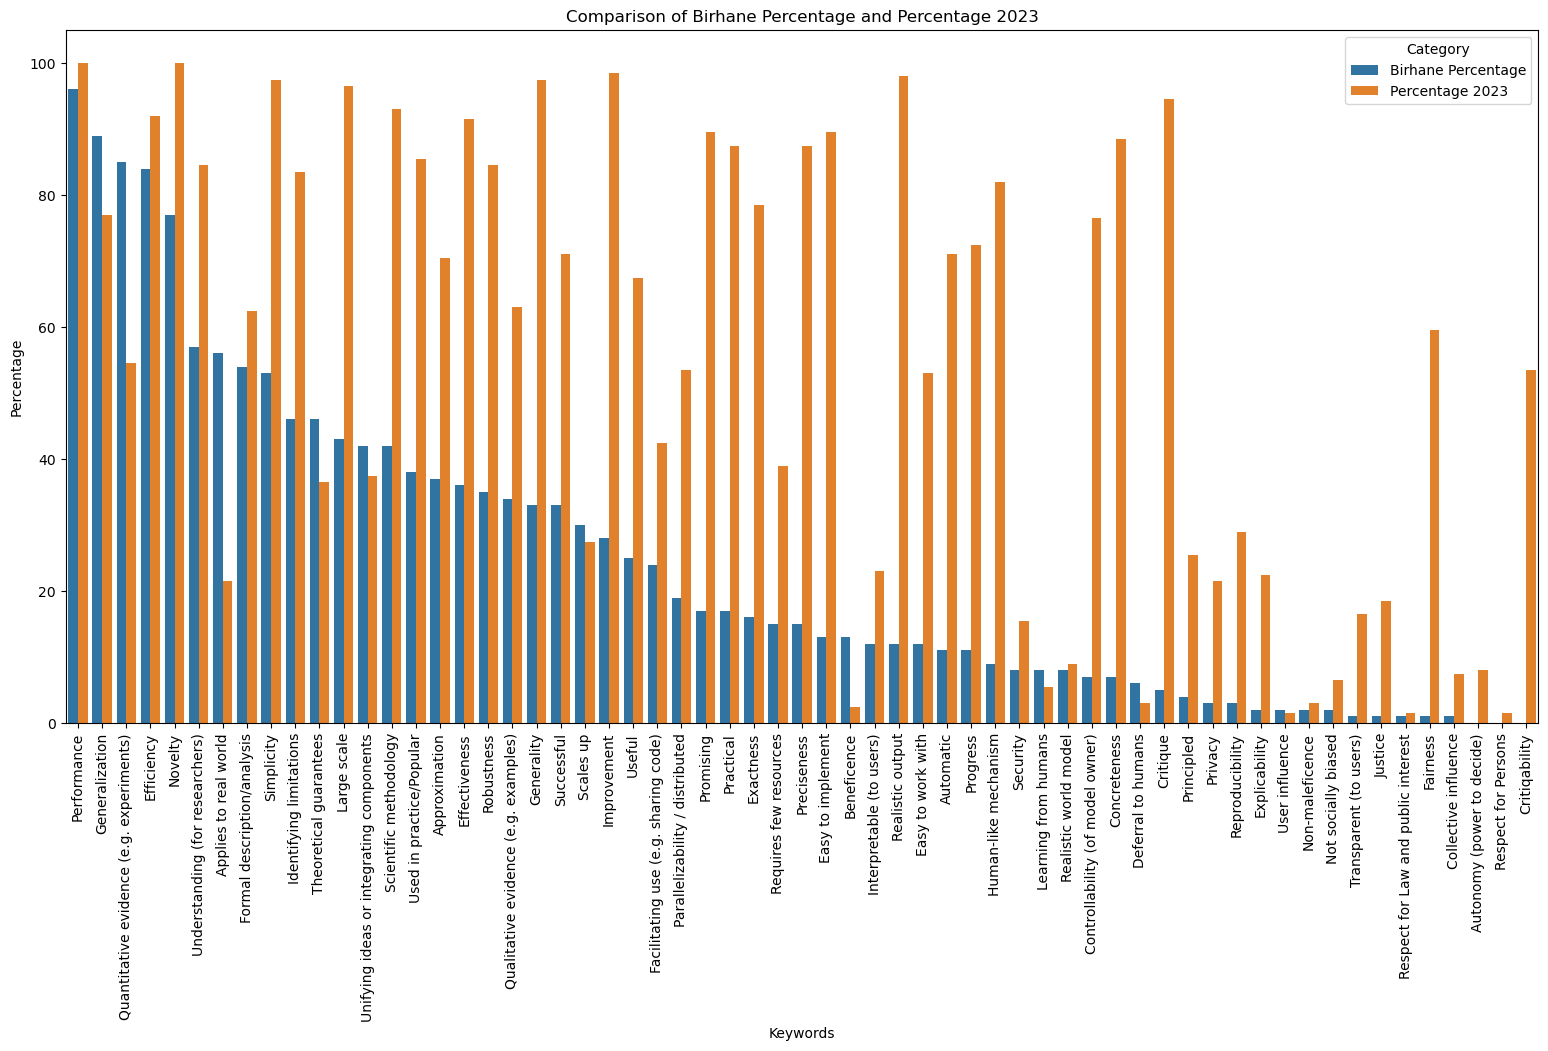

<Figure size 640x480 with 0 Axes>

In [14]:
# Melt the dataframe for easier plotting with seaborn
melted_df = merged_df.melt(id_vars='Value', var_name='Category', value_name='Percentage')

# Plot using seaborn
plt.figure(figsize=(19, 9))
sns.barplot(data=melted_df, x='Value', y='Percentage', hue='Category')
plt.title('Comparison of Birhane Percentage and Percentage 2023')
plt.xlabel('Keywords')
plt.ylabel('Percentage')
plt.xticks(rotation=90)
plt.legend(title='Category')
plt.show()


# Save the plot
plt.savefig('plots/percentage_comparison_brihane.png')

In [ ]:
# Combine the keywords to be highlighted
highlight_keywords = highlight_keywords_user_rights + highlight_keywords_ethics

# Filter the percentage_with_value_sorted series to include only the specified keywords
filtered_percentage_with_value = percentage_with_value_sorted[highlight_keywords]

# Plot the filtered percentages
plt.figure(figsize=(19, 9))
bars = filtered_percentage_with_value.plot(kind='bar', color='green')

# Highlight specific bars in orange for user rights
for keyword in highlight_keywords_user_rights:
    if keyword in filtered_percentage_with_value.index:
        bars.patches[filtered_percentage_with_value.index.get_loc(keyword)].set_color('orange')

# Highlight specific bars in blue for ethics
for keyword in highlight_keywords_ethics:
    if keyword in filtered_percentage_with_value.index:
        bars.patches[filtered_percentage_with_value.index.get_loc(keyword)].set_color('blue')

# Add legend
orange_patch = mpatches.Patch(color='orange', label='User Rights')
blue_patch = mpatches.Patch(color='blue', label='Ethical Principles')
plt.legend(handles=[orange_patch, blue_patch])

plt.title('Percentage of Papers with a Value for Each Highlighted Keyword')
plt.xlabel('Keywords')
plt.ylabel('Percentage of Papers')
plt.xticks(rotation=90)
plt.show()

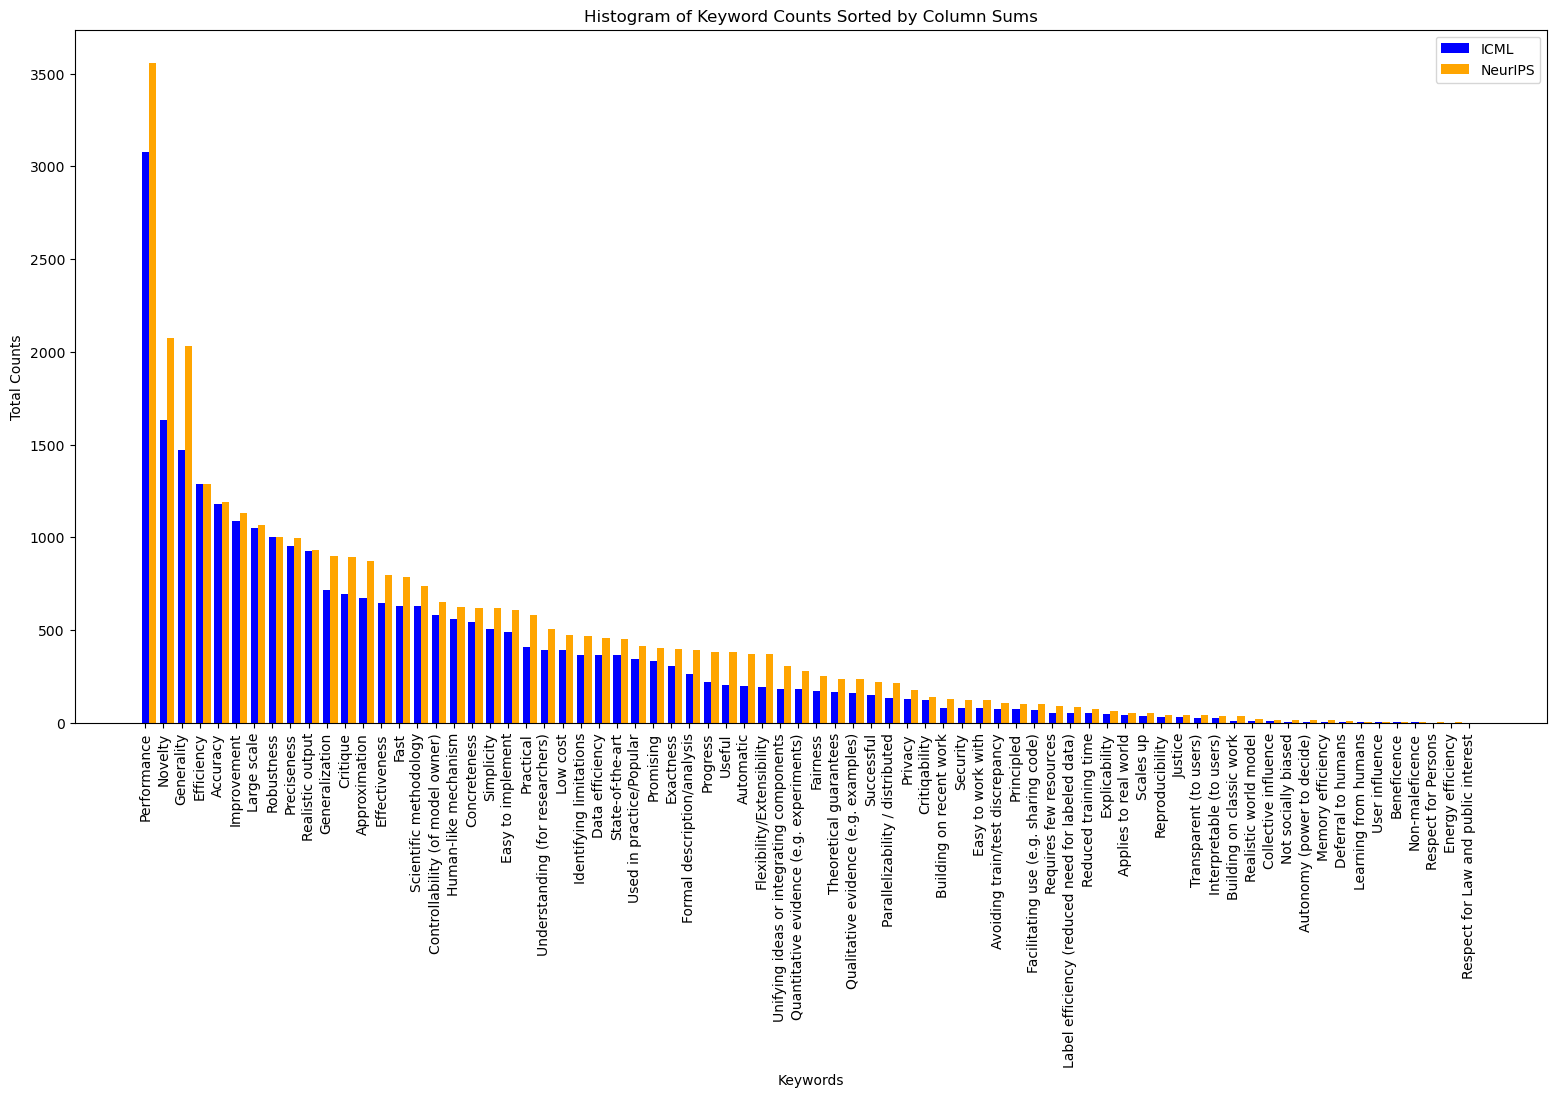

In [15]:
# Calculate the column sums
column_sums_icml = keyword_matrix_icml.iloc[:, 1:].sum().sort_values(ascending=False)
column_sums_neurips = keyword_matrix_neurips.iloc[:, 1:].sum().sort_values(ascending=False)

# Plot the histogram
plt.figure(figsize=(19, 9))
width = 0.4  # the width of the bars

# Create positions for the bars
positions_icml = range(len(column_sums_icml))
positions_neurips = [p + width for p in positions_icml]

# Plot the bars
plt.bar(positions_icml, column_sums_icml, width=width, label='ICML', color='blue')
plt.bar(positions_neurips, column_sums_neurips, width=width, label='NeurIPS', color='orange')

# Add legend
plt.legend()
plt.title('Histogram of Keyword Counts Sorted by Column Sums')
plt.xlabel('Keywords')
plt.ylabel('Total Counts')
plt.xticks(ticks=positions_icml, labels=column_sums_icml.index, rotation=90)
plt.show()